# Matrispotenser

<a target="_blank" href="https://colab.research.google.com/github/JaTaSn/jts-TATA24/blob/main/Kod/matrispotenser.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Beräkning av potenser av kvadratisk matris

Tag en kvadratisk $n \times n$-matris $A$, t. ex.
$$A=  \begin{pmatrix}
    1 & 2 \\ 3 & 4
  \end{pmatrix}.$$ 
  Vi kan beräkna $A^2=A*A$, sedan $A^3=A*A^2$, och $A^4=A*A^3$,
  eller som $A^2*A^2$.
Antag att vi behöver beräkna $A^{115}$. Hur gör vi det med minst antal
matrismultiplikationer?

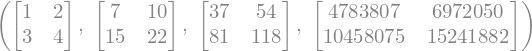

In [1]:
from sympy import *
init_printing()
A = Matrix(2,2,[1,2,3,4])
A,A**2,A**3,A**10

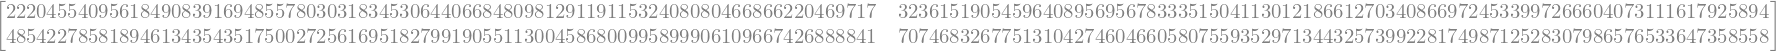

In [2]:
A**115

En vanlig variant är så kallad "iterad dubbling" där
man för tex $37 = 2^{32} + 2^4 + 2^1$ beräknar
$A^2, A^4, A^{16}, A^{32}$
och sedan $A^{37} = A^{32}*A^4*A$

In [26]:
def MyMatPow(M,p):
    m,n = shape(M)
    if m != n:
         return
    A = eye(n)
    a = 0
    Mpo = M
    b = 1
    while (p > 0):      
        if p & 1:
            A = A*Mpo
            a = a + b
        print(p,a,b)
        Mpo = Mpo*Mpo
        b = 2*b
        p = p >> 1
          
    return A
 

37 1 1
18 1 2
9 5 4
4 5 8
2 5 16
1 37 32


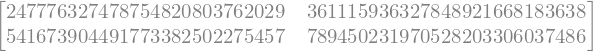

In [27]:
MyMatPow(A,37)

Skriv en egen variant av detta!

## Cayley-Hamilton
Alla $n \times n$-matriser bildar vektorrum av dim $n^2$.   
Så om vi räknar ut $A^0,A^1,\dots,A^{n^2}$ så har vi $n^2+1$ vektorer
  i $\mathbf{R}^{n^2}$, de är alltså linjärt beroende.
  I själva verket så är redan $A^0,A^1,\dots, A^n$ linjärt beroende!
  Räkna ut $A^0=I$,$A$,$A^2$ i exemplet, konvertera till 
  $\mathbf{R}^4$,
  och hitta $c_1,c_0$
  så att
  $$
    A^2 + c_1A + c_0I = \mathbf{0}.
  $$
  Skriv detta som
  $$
    A^2 = -d_1A - d_0I
  $$
  Använd relationen ovan för att beräkna $A^2,A^3,A^4,A^5$. Kontrollera att
  det stämmer mha din tidigare metod.


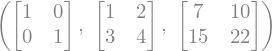

In [33]:
A**0, A**1, A**2

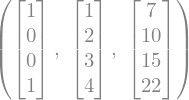

In [50]:
k1,k2,k3=Matrix(4,1,A**0), Matrix(4,1,A**1), Matrix(4,1,A**2)
k1,k2,k3

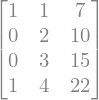

In [53]:
M = Matrix.hstack(k1,k2,k3)
M

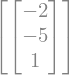

In [55]:
M.nullspace()

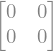

In [56]:
-2*A**0 -5*A**1 + A**2

Så om $A^2 -5A-2I = 0$ dvs $A^2 = 5A-2I$ följer att 
$$A^3 = A(A^2 - 5A -2I) +23A - 10I = 23A-10I$$ osv.


In [58]:
  t = symbols('t')
  p = t**2 -5*t + 2
  print('[\n')
  for j in range(1,5+1):
      q = t**j
      q2, r2 = div(q,p, domain='QQ')
      c = r2.subs(t,0)
      restmat = (r2-c).subs(t,A)
      totmat = restmat + c*eye(2)
      print(f'[{j},{r2},{totmat}]\n')
  print(']\n')

[

[1,t,Matrix([[1, 2], [3, 4]])]

[2,5*t - 2,Matrix([[3, 10], [15, 18]])]

[3,23*t - 10,Matrix([[13, 46], [69, 82]])]

[4,105*t - 46,Matrix([[59, 210], [315, 374]])]

[5,479*t - 210,Matrix([[269, 958], [1437, 1706]])]

]



Är denna metod bättre/snabbare än itererad dubbling?

## Sekularpolynom (karakteristiskt polynom)
Läs i kursboken om karakteristiska polynom
och Cayley-Hamiltons sats.

In [59]:
A.charpoly()